In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Input,InputLayer, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.models import Sequential
import tensorflow as tf

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')



In [3]:
y_train = train_data['label'].astype('float32')
X_train = train_data.drop(['label'], axis=1).astype('int32')
X_predict = test_data.astype('float32')
X_train.shape, y_train.shape, X_predict.shape

((42000, 784), (42000,), (28000, 784))

In [4]:
X_train = X_train/255
X_predict = X_predict/255
X_train = X_train.values.reshape(-1,28,28,1)
X_predict = X_predict.values.reshape(-1,28,28,1)
X_train.shape, X_predict.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33600, 28, 28, 1), (8400, 28, 28, 1), (33600,), (8400,))

In [16]:
y_train_cat = to_categorical(y_train, num_classes = 10)
print(train_data['label'].head())
y_train_cat[0:5,:]

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

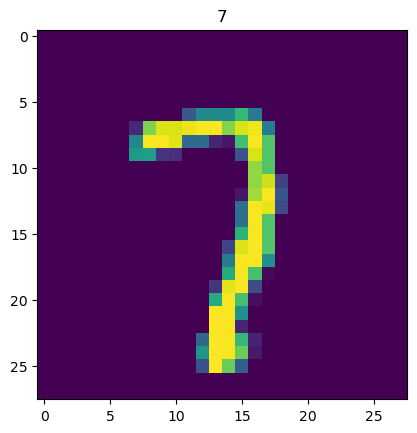

In [18]:
plt.imshow(X_train[1][:,:,0])
plt.title(y_train_cat[1].argmax());

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [9]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1050/1050 [==============================] - 2s 1ms/step - loss: 0.3709 - accuracy: 0.8923
Epoch 2/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1790 - accuracy: 0.9477
Epoch 3/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1312 - accuracy: 0.9607
Epoch 4/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1029 - accuracy: 0.9679
Epoch 5/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0855 - accuracy: 0.9734
Epoch 6/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0727 - accuracy: 0.9777
Epoch 7/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0638 - accuracy: 0.9792
Epoch 8/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0536 - accuracy: 0.9829
Epoch 9/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0514 - accuracy: 0.9833
Epoch 10/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.045

In [10]:
model.evaluate(X_test,  y_test)

263/263 [==============================] - 0s 724us/step - loss: 0.0832 - accuracy: 0.9789


[0.08318671584129333, 0.9789285659790039]

In [12]:
y_predict = model.predict(X_predict)
y_predict = np.argmax(y_predict,axis=1)
my_submission = pd.DataFrame({'ImageId': list(range(1, len(y_predict)+1)), 'Label': y_predict})
my_submission.to_csv('submission.csv', index=False)

875/875 [==============================] - 1s 662us/step


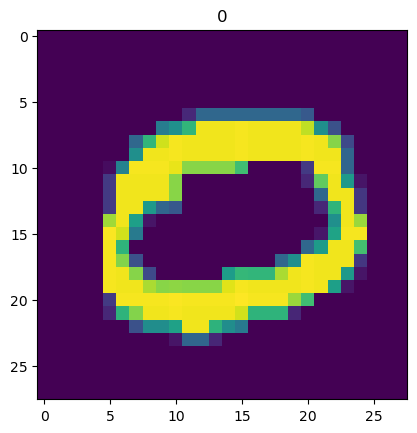

In [22]:
y_pred_cat = to_categorical(y_predict, num_classes = 10)
plt.imshow(X_predict[1][:,:,0])
plt.title(y_pred_cat[1].argmax());


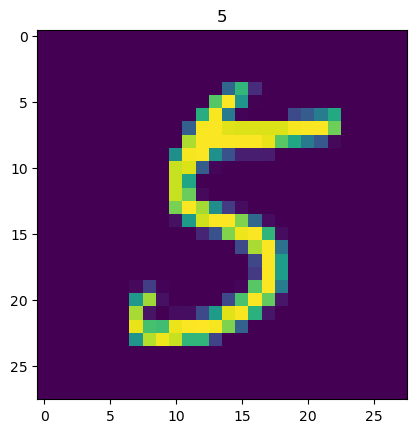

In [23]:
plt.imshow(X_predict[80][:,:,0])
plt.title(y_pred_cat[80].argmax());

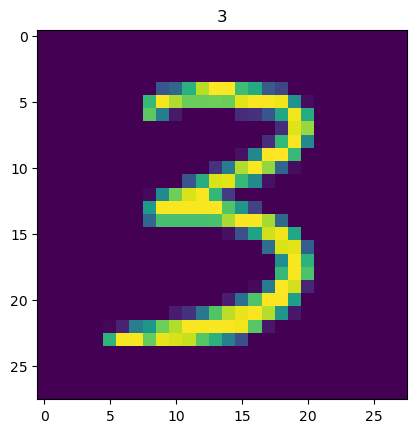

In [24]:
plt.imshow(X_predict[9][:,:,0])
plt.title(y_pred_cat[9].argmax());